# **Proyecto Final:** C√°lculo de PCA aplicado a compresi√≥n de im√°genes.

**Carlos Bautista$^*$, Edgar Bazo$^*$, Luz Hern√°ndez$^*$ e Ita Santiago$^*$**

$^*$ Alumnos de la materia ANCC

## Introducci√≥n
Como se vio en clase de optimizaci√≥n, el c√≥mputo matem√°tico ha ayudado al desarrollo tecnol√≥gico e inform√°tico con un acelerado crecimiento, lo cual ha incrementado la cantidad de informaci√≥n (datos) a computar. Podemos asumir que este crecimiento es exponencial y la forma en la que se trata hoy, con respecto a hace algunos a√±os, no es la misma, lo cual ha impulsado a la investigaci√≥n y aplicaci√≥n de matem√°ticas para optimizar los problemas que esto ha tra√≠do. En este contexto, tenemos muy claro que independientemente del avance tecnol√≥gico los recursos computacionales (hardware, software) son finitos y los costos de implementaci√≥n y mantenimiento pueden ser elevados.

En este proyecto, trabajaremos en el an√°lisis de componentes principales (PCA) para datos de im√°genes. PCA es una famosa t√©cnica de reducci√≥n de dimensionalidad no supervisada que viene a nuestro rescate cada vez que la maldici√≥n de la dimensionalidad nos persigue. Aunado a esto, vamos a calcular las componentes principales haciendo uso del algoritmo de rotaciones de Jacobi para obtener los SVD y a partir de estos los PCA.

Uno de los casos de uso de PCA es que se puede utilizar para la compresi√≥n de im√°genes, una t√©cnica que minimiza el tama√±o en bytes de una imagen manteniendo la mayor calidad de imagen posible. Una imagen de color t√≠pica se compone de p√≠xeles, muchos p√≠xeles se unen en una matriz para formar una imagen digital. Dicha im√°gen digital t√≠pica se crea apilando matrices de p√≠xeles rojo, azul y verde de intensidades que van de 0 a 255.

## Teor√≠a

### Repaso de PCA

PCA es uno de los m√©todos m√°s utilizados para encontrar patrones en los datos y es usado frecuentemente cuando cada observaci√≥n contiene muchas caracter√≠sticas y no todas ellas son significativas, pero tambi√©n se usa cuando existe mucha covarianza entre las caracter√≠sticas. En pocas palabras, describe los datos resumi√©ndolos en patrones t√≠picos llamados componentes principales, en donde estos nos permitir√°n explicar los valores a trav√©s de una combinaci√≥n de ellos.

Las componentes principales encuentran una proyecci√≥n lineal de datos en un sistema de base ortogonal que tiene la redundancia m√≠nima y conserva la variaci√≥n en los datos.
Aplicaciones: 
* Identificar la dimensionalidad intr√≠nseca de los datos.
* Representaci√≥n dimensional m√°s baja de datos con el menor error de reconstrucci√≥n.

# Antes de la secci√≥n 1.2.2 coloquen el problema de optimizaci√≥n (o problemas de optimizaci√≥n) que se resuelven en el PCA (esto es s√∫per importante)

### PCA para reducci√≥n de dimensionalidad

* Si los datos viven en un espacio dimensional inferior, entonces algunos de los valores propios en la matriz se establecen en 0.
* Si queremos reducir la dimensionalidad de los datos de $d$ a algunos fijos $k$ elegimos los eigenvectores correspondientes a los $k$ eigenvalor m√°s altos, i.e. las dimensiones que conservan la mayor parte de la varianza en los datos.
* Esta selecci√≥n tambi√©n minimiza el error de reconstrucci√≥n de datos (por lo que las mejores $k$ dimensiones conducen al mejor error).

### Algoritmo PCA

Pasos para realizar el PCA: de una matriz $X\in \mathbb{R}_{N\times a}$ a una matriz $X_{pca}\in \mathbb{R}_{N\times b}$:

1. Normalizaci√≥n: Centrar la matriz, substrayendo la media.
2. Calcular la matriz de covarianzas de la matriz centrada $C=\frac{1}{N-1}X^TX$.
3. Calcular los eigenvectores de la matriz de covarianzas.
4. Seleccionar los $m$ eigenvectores correspondientes a los eigenvalores m√°s grandes.

Obtenemos los **Componentes Principales de X** al multiplicar estos eigenvectores por $X_{centrada}^{T}$.

El proceso de PCA identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviaci√≥n est√°ndar 1, aquellas variables cuya escala sea mayor dominar√°n al resto. De ah√≠ que sea recomendable estandarizar siempre los datos.

Los pasos anteriores se realizan a la matriz de covarianzas, sin embargo otro enfoque es el c√°lculo de la descomposici√≥n en valores singulares de la matriz X. Tal enfoque tiene ventajas sobre los pasos descritos como es el no calcular la matriz de covarianzas.

### Relaci√≥n entre de valores singulares y eigenvalores
El n√∫mero $\sigma$ se denomina valor singular de $A$ si $\sigma=\sqrt{\lambda A^TA}=\sqrt{\lambda AA^T}$ donde: $\lambda A^TA$ y $\lambda AA^T$ es eigenvalor de $A^TA$ y $AA^T$ respectivamente.

### Uso de rotaciones de Jacobi
Este m√©todo produce una secuencia de transformaciones ortogonales de la forma $J_k^TAJ_k$ con el objetivo de hacer ‚Äúm√°s diagonal‚Äù a la matriz $A\in\mathbb{R}_{n \times n}$.

Si la matriz $A$ es sim√©trica y $J_0$ es una transformaci√≥n de rotaci√≥n de Jacobi, entonces el esquema iterativo:

$$A_{k+1}=(J_0J_1\dots J_k)^TA(J_0J_1\dots J_k)$$
converge a una matriz diagonal en la que se encuentran los eigenvalores de $A$.

### Algoritmo rotaciones de Jacobi

Dados $A$ sim√©trica y $tol>0$ definir $A_0=A$, $Q_0=I_n$.

Repetir el siguiente bloque para $k=0,1,2,\dots$

1. Elegir un par de √≠ndices $(idx1,idx2)$ seg√∫n las metodolog√≠as vistas en clase,

2. Calcular las entradas $cos(\theta),sin(\theta)$ de la matriz de rotaci√≥n $J_k$,

3. $A_{k+1}=J^T_kA_kJ_k$,

4. $Q_{k+1}=Q_kJ_k$,

hasta convergencia: satisfacer criterio de paro en el que se utiliza $tol$ y $maxsweeps$.

La matriz $J_k$ se utiliza para eliminar un par de entradas (sim√©tricas) en la matriz $A_k$, esto preserva la simetr√≠a de la matriz original. En las columnas de la matriz $Q_k$ se encuentran aproximaciones a los eigenvectores de $A$ y en la diagonal de $A_k$ se tienen aproximaciones a los eigenvalores de $A$.

Una vez analizado todo lo anterior, crearemos las funciones necesarias para llevar a cabo la compresi√≥n de im√°genes.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from numpy import cov
from math import sqrt
from scipy.stats import stats
from sklearn.decomposition import PCA

import os, sys
os.chdir("../..")

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
# funci√≥n de signo
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >= 0:
        return 1
    else:
        return -1
    

# funci√≥n que calcula entradas de matriz de rotaci√≥n Jacobi
def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1, idx2]) > np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1]) / (2 * Ak[idx1, idx2])
        t_star = sign(tau) / (np.abs(tau) + np.sqrt(1 + tau ** 2))
        c = 1 / np.sqrt(1 + t_star ** 2)
        s = c * t_star
    else:  # no rotation is performed
        c = 1
        s = 0

    return (c, s)


# funci√≥n que calcula matriz de rotaci√≥n Jacobi
def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J


def off(A):
    """
        Find the quantity "off(A)" Frobenius norm of ùê¥ without the diagonal..
        Args:
            A (numpy ndarray): Matrix to calculate "off(A)".
        Returns:
            scalar value(float): value of function off(A).
        """
    A_k = A[~np.eye(A.shape[0], dtype=bool)].reshape(A.shape[0], -1)

    return np.linalg.norm(A_k, 'fro')


def max_sweeps(n):
    """
            Find the maximum number of sweeps to iterate in Jacobi's rotation algorithm.
            Args:
                n (int value): It corresponds to the maximum number of entries
            in the matrix that form the upper triangular part of ùê¥ without
            counting the diagonal that are assumed to be different from zero..
            Returns:
                max_sweeps(Int): Maximum number of sweeps.
    """
    max_sw = (n * (n - 1)) / 2

    return max_sw

def jacobi_iteration(a, tol=1.0e-8):
    """
            Jacobi rotations function for symmetric matrices with repeated elimination
            Args:
                a (numpy ndarray): Matrix to compute Jacobi rotation.
                tol (float): a small, positive amount (commonly less than or equal to 10‚àí8).
            Returns:
                a_k (numpy ndarray): vector with eigenvalues of A.
                q_k (numpy ndarray): Matrix with eigenvectors of A.
    """

    # Realizamos una copia de A = A_k
    a_k = a.copy()

    # se define numero de dimension n basado en columnas
    # las entradas totales del triangulo superiores de A
    n = a_k.shape[1]

    # Definimos matriz identidad de x que generara vectores
    q_k = np.identity(n)

    # iniciamos contador de sweeps
    sweeps = 1
    # se calcula el valor maximo de sweeps
    max_sw = max_sweeps(n)

    # se calcula el Off inicial
    off_val = off(a_k)
    # se calcula tolerancia inicial
    tolerancia = tol * np.linalg.norm(a_k, 'fro')

    # se extraen los indices del triangulo sup de x
    tri_sup = np.triu_indices(n, 1)

    # se unen los indices en un solo array para hacer el loop de entradas de rotacion
    index_tri = np.column_stack((tri_sup[0], tri_sup[1]))

    #print("Max_Sweeps {}".format(max_sw))
    #print("------------------------\n\n")

    while off_val > tolerancia and sweeps < max_sw:

        #print("Sweeps {}".format(sweeps))
        #print("------------------------")

        for i in index_tri:
            # print("idx_1 = {}".format(i[0]))
            # print("idx_2 = {}".format(i[1]))

            j = compute_Jacobi_rotation(a_k, i[0], i[1])
            a_k = j.T @ a_k @ j
            q_k = q_k @ j

        # Se calcula nueva off y se imprime
        off_val = off(a_k)
        #print("Off(x_k) = {}".format(off_val))
        # se calcula nueva tolerancia y se imprime
        tolerancia = tol * np.linalg.norm(a_k, 'fro')
        #print("tolerancia = {}\n".format(tolerancia))

        #print("La transformaci√≥n de x_k queda como:")
        #print(a_k)
        #print("\nLa matriz q_k queda como:")
        #print(q_k)
        #print("------------------------\n\n")

        sweeps += 1
        
        
    # actualizacion del metodo para ordenar los eigenvectores 
    # de forma ascendente de acuerdo a su eigenvalor
    
    # se extraen los valores de la diagonal que en este caso son
    # los eigenvalues
    eValues = np.diag(a_k)
    
    # con esta funcion se extraen los indices
    #  ordenados de forma descendente de los evalues
    sort_eval = eValues.argsort()[::-1]
    
    # se ordenan los eigenvalues de forma descendente
    # y se asigna a_k
    a_k = eValues[sort_eval]

    # utilizando los indices del ordenamiento de los eValues
    # ordenamos la matriz q_k por las columnas y la asignamos de nuevo a q_k
    # con esto se ordena de manera descendente la matriz q_k de acuerdo 
    # a sus evalues a_k
    q_k = q_k[:,sort_eval]
    
    print("Sweeps {}".format(sweeps))
    print("------------------------")
    print("Off(x_k) = {}".format(off_val))
    print("tolerancia = {}\n".format(tolerancia))

    #print("La transformaci√≥n de x_k queda como:")
    #print(a_k)
    print("\nLa matriz q_k queda como:")
    print(q_k)
    print("------------------------\n\n")

    
    return a_k, q_k



def returnPCA(x, method):
    """
                Return PCA function to calculate the principal components of a matrix
                Args:
                    x (numpy ndarray): Matrix to compute PCA
                    method (str): string that indicates the method to be used for the
                                  approximation of eigenvalues and eigenvectors,
                                  "jacobi" for the jacobi_iteration method or "linalg" for the numpy method
                Returns:
                    x_k (numpy ndarray): vector with eigenvalues of x
                    q_k (numpy ndarray): Matrix with components of x
                    pca (numpy ndarray): Matrix with principal components scores of x
    """

    # se centra x
    x_c = x - x.mean(axis=0)

    # se calcula la covarianza de la matriz centrada transpuesta x_c.T que resulta en v
    v = np.cov(x_c.T)
    # se inicializan las variables a retornar
    x_k = np.empty(x_c.shape)
    q_k = np.empty(x_c.shape)

    # se calculan los eigenvalores y eigen vectores se puede utilizar
    # el metodo de jacobi_iteration o linalg de numpy
    if method == "jacobi":
        x_k, q_k = jacobi_iteration(v, tol=1.0e-8)
    elif method == "linalg":
        x_k, q_k = np.linalg.eig(v)
    else:
        print("no method found")

    # Obtenemos los Scores Componentes Principales de x al multiplicar .dot q_k.T por x_c.T centrada .
    pca = q_k.T.dot(x_c.T)
    # retorna pca.T
    return x_k, q_k, pca.T

Haremos el c√°lculo de **eigenvalores** y **eigenvectores** de nuestra matriz $X$ de datos utilizando **m√©todo de rotaciones de Jacobi y ordenamiento c√≠clico por renglones.**

Se toman las funciones definidas en la nota [2.3 Algoritmos y aplicaciones de eigenvalores y eigenvectores de una matriz](https://itam-ds.github.io/analisis-numerico-computo-cientifico/2.computo_matricial/2.3/Algoritmos_y_aplicaciones_de_eigenvalores_eigenvectores_de_una_matriz.html) del libro de Optimizaci√≥n.

Definimos las funciones para "diagonalizar" la matriz $X^{T}X$ con rotaciones de Jacobi a trav√©s del m√©todo de ordenamiento c√≠clico por renglones.

Primero, definimos funciones auxiliares `off()` y `max_sweeps()` para el criterio de paro

Definimos funci√≥n que realiza las iteraciones de Jacobi:

Ahora realizaremos el c√°lculo con una funci√≥n que implementamos y que nos ayuda a calcular las PCA, bas√°ndonos en el m√©todo de Jacobi

Recordamos que las "direcciones principales est√°n dadas por las columnas de $V$ (salvo signos positivos o negativos)", y que las "**componentes principales est√°n dadas por la multiplicaci√≥n matricial de $XV$** (salvo signos positivos o negativos)"

Siguiendo un m√©todo m√°s directo y que tambi√©n funciona, con base en nota [2.4 del libro de Optimizaci√≥n](https://itam-ds.github.io/analisis-numerico-computo-cientifico/2.computo_matricial/2.4/Valores_vectores_singulares_y_algoritmos_para_calcular_la_SVD.html). Podemos obtener PCA multiplicando $X_{centrada}$ por $V$ (obtenida a partir de $Q_k$ resultante de aplicar Jacobi a $X^{T}X$).

## PCA para compresi√≥n de im√°genes

Como vimos, el an√°lisis de componentes principales, o PCA, es una t√©cnica estad√≠stica para convertir datos de alta dimensi√≥n en datos de baja dimensi√≥n, mediante la selecci√≥n de las caracter√≠sticas m√°s importantes que capturan la m√°xima informaci√≥n (varianza) sobre el conjunto de datos [6]. 

Basamos la idea de nuestras funciones en las caracter√≠sticas que se seleccionan sobre la base de la varianza que causan en la salida. Como tambi√©n aprendimos en clase, la caracter√≠stica que causa la mayor variaci√≥n es el primer componente principal. La caracter√≠stica que es responsable de la segunda varianza m√°s alta se considera el segundo componente principal, y as√≠ sucesivamente. Es importante mencionar que los componentes principales no tienen ninguna correlaci√≥n entre s√≠.

Aparte de las m√∫ltiples aplicaciones de PCA, otra aplicaci√≥n interesante es la compresi√≥n de im√°genes, nuestra motivaci√≥n para usar esta herramienta para eso, se explica en la siguiente secci√≥n. 

Echemos un vistazo a c√≥mo podemos lograr esto con Python.

## Motivaci√≥n

Como se mencion√≥ en la introducci√≥n, una de las aplicaciones generales m√°s importantes del PCA es la reducci√≥n de dimensionalidad. √âsta a su vez es de m√∫ltiple utilidad en diversos contextos de la ciencia de datos que van desde la hasta la compresi√≥n de im√°genes.

En el caso de este presente trabajo nos interesa probar el funcionamiento de algoritmos utilizados en el curso para reducir dimensionalidad a trav√©s de PCA, aplicados a la compresi√≥n de im√°genes. Se busca lograr los resultados consistentes con lo obtenido con las paqueter√≠as de python com√∫mnente utilizadas para resolver estos problemas (linalg y scikit-learn).

En la pr√°ctica del DeepLearning, es com√∫n utilizar im√°genes para entrenar modelos de redes neuronales, para reconocimiento de im√°genes, entre otros. Para ello se utilizan una gran cantidad de imag√©nes voluminosas para entrenar los modelos, lo cual afecta los tiempos de procesamiento.

En un contexto de recursos limitados, resulta de gran utilidad procesar las im√°genes para comprimirlas (reducir la dimensionalidad) y lograr eficiencia en los procesos sin afectar la calidad de las im√°genes, obteniendo as√≠ resultados muy similares con mayor eficiencia.

### Cargando la imagen
Vamos a usar una foto de una de nuestras mascotas.


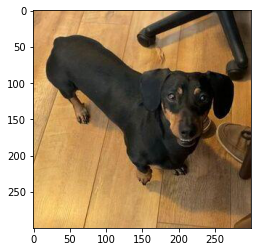

In [4]:
# Loading the image
img_path = 'img/Capi_300.jpg'
#img = cv2.imread(img_path)
#plt.imshow(img)
img=plt.imread('img/Capi_300.jpg')
plt.imshow(img)
plt.show()

Veamos el tama√±o de la imagen

In [5]:
img.shape

(300, 300, 3)

### Divisi√≥n de la imagen en formato RGB

Sabemos que una imagen digital en color es una combinaci√≥n de matrices R, G y B (rojo, verde, azul) apiladas unas sobre otras. Es necesario dividir cada canal de la imagen y extraer los componentes principales de cada uno de ellos.

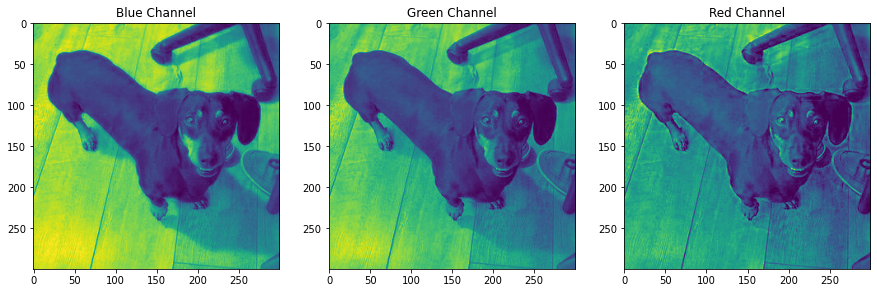

In [6]:
blue,green,red = cv2.split(img)

# Ve√°moslo en sus diferentes matices
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

Escalamos los datos

In [7]:
df_blue = blue/255
df_green = green/255
df_red = red/255

### PCA con Jacobi

In [8]:
evalues, q_k, pca_k = returnPCA(df_blue,"jacobi")

Sweeps 12
------------------------
Off(x_k) = 4.64434533064189e-08
tolerancia = 1.1291604837680821e-07


La matriz q_k queda como:
[[ 0.002  0.002  0.019 ... -0.085 -0.001 -0.005]
 [ 0.001  0.001  0.015 ...  0.056 -0.036 -0.016]
 [ 0.001  0.002  0.016 ... -0.087  0.067 -0.044]
 ...
 [-0.027  0.004  0.106 ... -0.076 -0.055  0.074]
 [-0.029 -0.001  0.105 ...  0.06  -0.122 -0.09 ]
 [-0.031 -0.003  0.102 ... -0.048  0.114  0.008]]
------------------------




In [9]:
evalues_g, q_k_g, pca_k_g = returnPCA(df_green,"jacobi")

Sweeps 12
------------------------
Off(x_k) = 3.955010252000838e-08
tolerancia = 5.7625781190349237e-08


La matriz q_k queda como:
[[ 0.004 -0.012  0.029 ...  0.031  0.011  0.023]
 [ 0.003 -0.012  0.023 ... -0.008  0.052  0.011]
 [ 0.003 -0.012  0.025 ...  0.041 -0.017 -0.037]
 ...
 [-0.012 -0.001  0.112 ...  0.03  -0.013 -0.09 ]
 [-0.016  0.004  0.111 ...  0.032  0.114  0.006]
 [-0.019  0.007  0.106 ...  0.015 -0.036  0.011]]
------------------------




In [10]:
evalues_r, q_k_r, pca_k_r = returnPCA(df_red,"jacobi")

Sweeps 12
------------------------
Off(x_k) = 1.428643648947928e-08
tolerancia = 1.5953266404799593e-08


La matriz q_k queda como:
[[-0.     0.014 -0.029 ... -0.054 -0.132 -0.008]
 [-0.001  0.015 -0.021 ... -0.055  0.081 -0.004]
 [-0.001  0.016 -0.02  ...  0.108 -0.046  0.01 ]
 ...
 [ 0.028 -0.015 -0.114 ... -0.025 -0.171  0.008]
 [ 0.022 -0.024 -0.111 ...  0.044  0.144  0.037]
 [ 0.016 -0.028 -0.1   ... -0.023 -0.044 -0.013]]
------------------------




### Varianza explicada

In [11]:
total_evalues_b = sum(evalues)
var_exp = [(i/total_evalues_b) for i in sorted(evalues, reverse=True)]

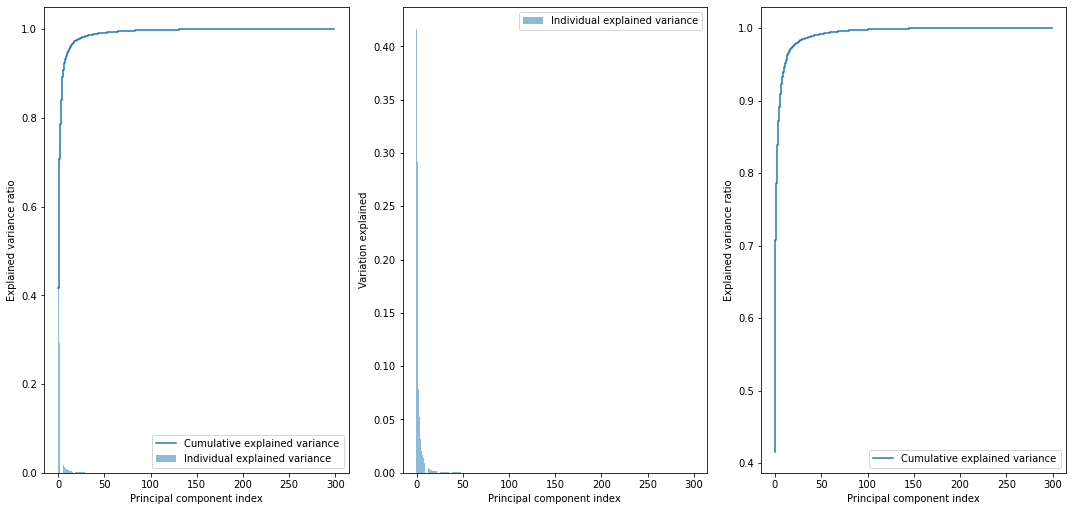

In [12]:
# Plot the explained variance against cumulative explained variance
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

fig.add_subplot(132)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Variation explained')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

fig.add_subplot(133)
#plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Podemos ver que con 50 componentes principales ya se explica m√°s del 95% y con 72 componentes (de 300) se explica el 99%.

In [13]:
#cum_sum_exp

**Canal verde**

In [14]:
total_evalues_g = sum(evalues_g)
var_exp_g = [(i/total_evalues_g) for i in sorted(evalues_g, reverse=True)]

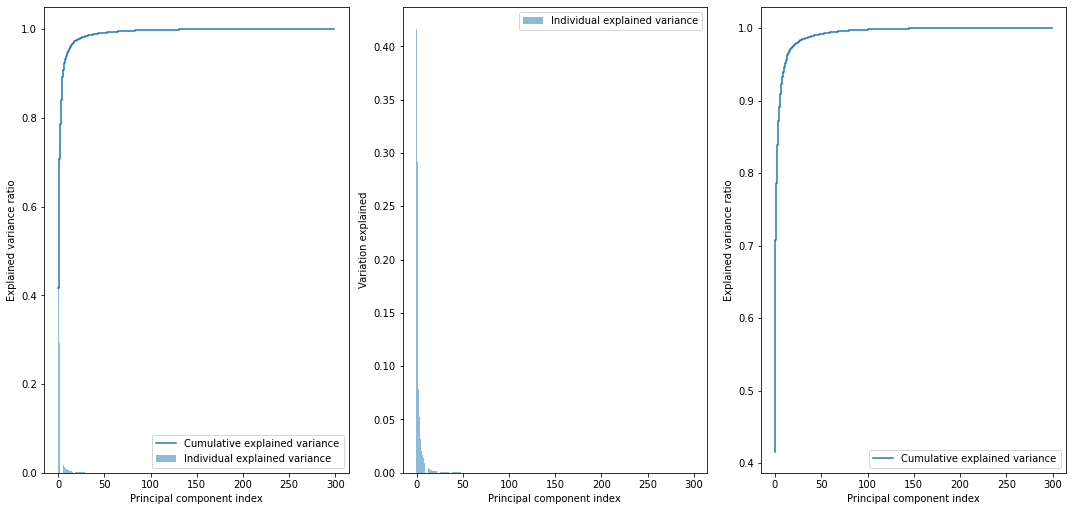

In [15]:
# Plot the explained variance against cumulative explained variance
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

fig.add_subplot(132)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Variation explained')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

fig.add_subplot(133)
#plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
# Para ver con cuantos componentes se explica
#cum_sum_exp

**Canal rojo**

In [17]:
total_evalues_r = sum(evalues_r)
var_exp_r = [(i/total_evalues_r) for i in sorted(evalues_r, reverse=True)]

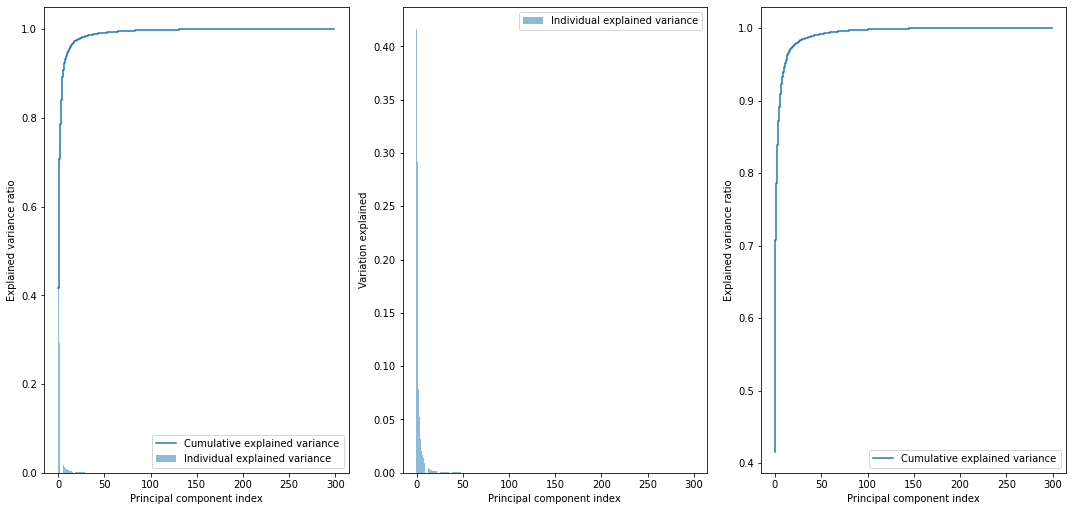

In [18]:
# Plot the explained variance against cumulative explained variance
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

fig.add_subplot(132)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Variation explained')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

fig.add_subplot(133)
#plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
# Para ver con cuantos componentes se explica
#cum_sum_exp

En el caso de los tres canales tenemos un desempe√±o similar, con menos de la cuarta parte de los datos.

### IMPORTANTE: Pendiente inverse_transform

In [21]:
np.set_printoptions(precision=3, suppress=True)

In [22]:
img=plt.imread('img/Capi_300.jpg')

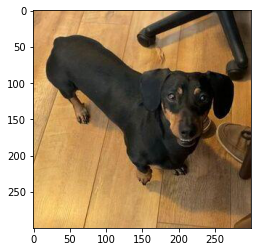

In [23]:
plt.imshow(img)
plt.show()

In [24]:
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

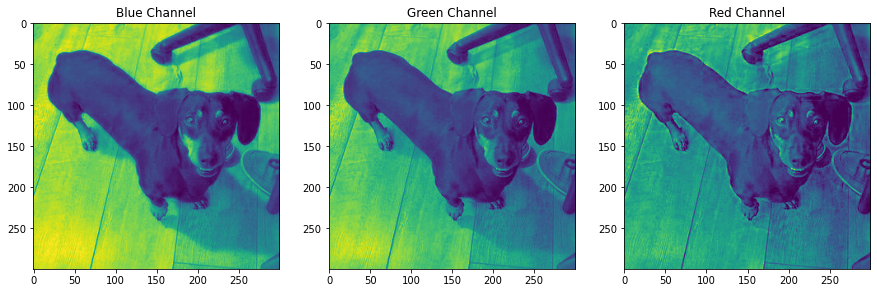

In [25]:
#Splitting into channels
#blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(b)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(g)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(r)
plt.show()

In [26]:
df_blue = b/255
df_green = g/255
df_red = r/255

In [27]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [28]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.991735312788283
Green Channel: 0.9846153727870853
Red Channel  : 0.955207320440407


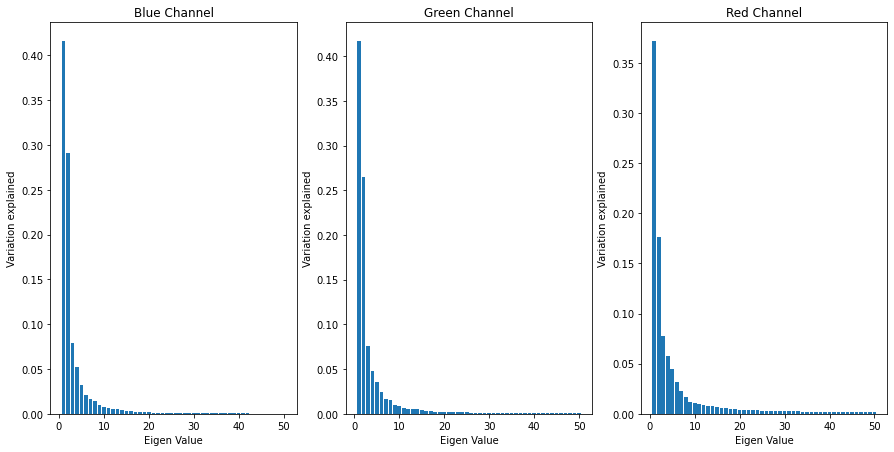

In [29]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [30]:
data_red =  np.dot(df_red - pca_r.mean_, pca_r.components_.T)

In [31]:
dat_inv_trans = np.dot(data_red, pca_r.components_) + pca_r.mean_

In [32]:
pca_r.inverse_transform(trans_pca_r)

array([[0.425, 0.401, 0.383, ..., 0.304, 0.3  , 0.271],
       [0.426, 0.386, 0.361, ..., 0.289, 0.297, 0.267],
       [0.409, 0.379, 0.357, ..., 0.296, 0.303, 0.271],
       ...,
       [0.461, 0.453, 0.441, ..., 0.166, 0.162, 0.158],
       [0.452, 0.445, 0.418, ..., 0.154, 0.16 , 0.151],
       [0.454, 0.434, 0.404, ..., 0.142, 0.161, 0.146]])

### Recontrucci√≥n de la imagen

Ahora que tenemos una reducci√≥n de dimensionalidad usando nuestra funci√≥n PCA, sabemos que tenemos un m√°s del 95% de varianza explicada, ahora visualizaremos la imagen nuevamente y para eso, primero tenemos que invertir la transformaci√≥n de los datos y luego fusionar los datos de los 3 canales en uno.

In [33]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
#print(b_arr.shape, g_arr.shape, r_arr.shape)

In [34]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
#print(img_reduced.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


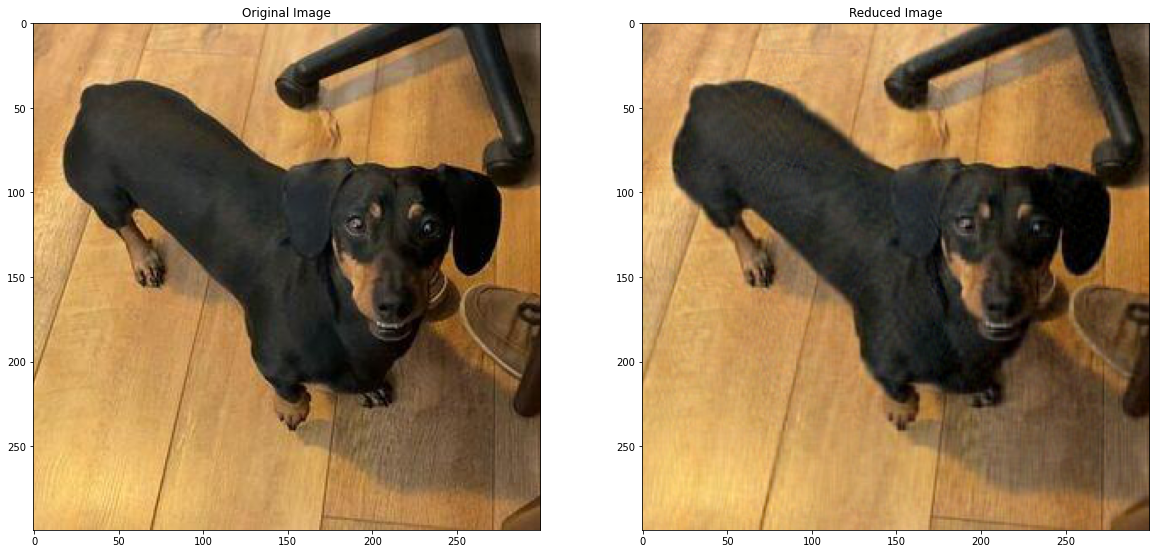

In [35]:
fig = plt.figure(figsize = (20, 10)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

Como nuestro ojo humano puede apreciar, la diferencia entre las dos im√°genes es m√≠nima, sin embargo, hemos usado la sexta parte de la informaci√≥n.

## Conclusiones

Como se vio durante el curso y que fue uno de los prop√≥sitos a demostrar en este proyecto, el tener demasiadas caracter√≠sticas de una observaci√≥n se traduce en demasiadas dimensiones que definen a un objeto o registro y este, a su vez, genera un costo computacional muy alto al querer transformar, manipular o  computar datos para efectos de cualquier estudio o an√°lisis. Sim embargo, la compresi√≥n de im√°genes con an√°lisis de componentes principales es una aplicaci√≥n √∫til y relativamente sencilla de implementar gracias a que podemos ver a las im√°genes como matrices hechas de valores del color de los p√≠xeles. Adem√°s, tuvimos la oportunidad de extender esta implementaci√≥n usando las rotaciones de Jacobi para crear nuestra propia funci√≥n para obtener las PCA y a partir de estas, poder reducir la dimensi√≥n de una imagen en color dividi√©ndola en 3 canales y luego reconstruy√©ndola para su visualizaci√≥n.

La reducci√≥n de la dimensionalidad actualmente es aplicada en distintos campos, por ejemplo: procesamiento de se√±ales de video como remasterizaci√≥n, procesamiento de se√±ales de audio como reducci√≥n de ruido, reconocimiento de voz como en las IA Alexa, Siri o Cortana, visualizaci√≥n de grandes vol√∫menes de datos (Big Data), en modelado de datos para predicci√≥n, Machine learning, compresi√≥n de im√°genes con la menor p√©rdida de calidad como lo expuesto en este proyecto, etc. En estos casos es posible que nos enfrentar√≠amos a problemas con la convergencia de los algoritmos que desarrollamos para este trabajo, por lo que esperamos en un futuro mejorar nuestras implementaciones para poder sobrellevar este tipo de retos.

Vimos tambi√©n que, debido a que los recursos computacionales son finitos, es imperativo optimizar los problemas que ayudan a reducir caracter√≠sticas mediante la reducci√≥n de dimensionalidad. Esto tiene importantes beneficios como optimizar el tiempo y costo computacional en el entrenamiento de modelos; transformar datos no lineales en una forma linealmente separables; facilidad para visualizar, analizar y entender los datos; eliminaci√≥n de caracter√≠sticas redundantes en los datos; etc. Nosotros pensamos que, en espec√≠fico, uno de los grandes beneficios es el tema de la reducci√≥n en el espacio de almacenamiento de los datos que pueden generar altos costos, monetarios y ambientales, de almacenaje y manutenci√≥n de la infraestructura.


## Bibliograf√≠a

* [1] [Palacios E. (2021) Libro de Optimizaci√≥n](https://itam-ds.github.io/analisis-numerico-computo-cientifico/2.computo_matricial/2.3/Algoritmos_y_aplicaciones_de_eigenvalores_eigenvectores_de_una_matriz.html) 
* [2] [Golub, G.H., and Van Loan, C.F. (1989) Matrix Computations, 3er ed. (Johns Hopkins University Press).](https://twiki.cern.ch/twiki/pub/Main/AVFedotovHowToRootTDecompQRH/Golub_VanLoan.Matr_comp_3ed.pdf)
* [3] [Alter O, Brown PO, Botstein D. (2000) Singular value decomposition for genome-wide expression data processing and modeling](https://doi.org/10.1073/pnas.97.18.10101)
* [4] [Amat J. (2017) An√°lisis de Componentes Principales](https://www.cienciadedatos.net/documentos/35_principal_component_analysis)
* [5] [Batal I., Strobl E., Hauskrecht M. (2014) Principal Component Analysis (PCA)and Singular Value Decomposition (SVD)](https://people.cs.pitt.edu/~milos/courses/cs3750-Fall2014/lectures/class9.pdf)
* [6] [Hurtado R. (2021) Compresi√≥n de Im√°genes Mediante Reducci√≥n de Dimensionalidad con T√©cnica de An√°lisis de Componentes Principales (PCA)](https://efecode.com/compresion-imagenes-reduccion-dimensionalidad-tecnica-analisis-componentes-principales-pca-visualizacion)
* [7] [Fu D., Guimaraes G. (2016) Using Compression to Speed Up Image Classification in Artificial Neural Networks](https://www.danfu.org/files/CompressionImageClassification.pdf)

## Referencias c√≥digo

* [1] [How to Calculate Principal Component Analysis (PCA) from Scratch in Python](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)
* [2] [numpy.column_stack](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html#numpy.column_stack)
* [3] [numpy.triu_indices](https://numpy.org/doc/stable/reference/generated/numpy.triu_indices.html)
* [4] [Dimensionality reduction of color image using PCA](https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118)
* [5] [How to reverse PCA and reconstruct original variables from several principal components?](https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com)
* [5] [On the Applications of Robust PCA in Image and Video Processing](https://ieeexplore.ieee.org/document/8425659)
* [6] [Application of Principal Component Analysis to Image Compression](https://www.intechopen.com/chapters/59936)
* [7] [Principal Component Analysis in Image Processing](https://www2.humusoft.cz/www/papers/tcp05/mudrova.pdf)